# Análise de dados dos jogos de futebol que assisti em 2022

Concluídos:
- Total de Gols dos Times da Casa
- Total de Gols dos Times Visitantes
- Total de Gols
- Média de Gols por Partida
- Total de Partidas
- Competições Assistidas
- Jogos por Competição
- Regiões assistidas
- Gráfico por 'Categoria'
- Vitórias dos times da casa
- Vitórias dos times visitante
- Empates

Ainda faltam:
- Time mais assistido
- Quantidade de jogos do time mais assistido
- Categorias de jogos do time mais assistido
- Vitórias, empates e derrotas do time mais assistido
- Qnt. gols time mais assistido
- Jogo com mais gols
- Gráfico de jogos por mês
- Média de jogos por mês
- Maior média de gols por região (mínimo 10 jogos)
- Maior média de gols por campeonato (mínimo 10 jogos)
- Maior média de gols por time (mínimo 10 jogos)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Carregar os dados
df = pd.read_excel("futebol_2022.xlsx", sheet_name='Futebol 2022', header=0, parse_dates=['Data'])

In [21]:
# Excluir colunas desnecessárias
df = df.drop(['Número', 'x'], axis=1)
print(df.head())

        Data      Região                Competição               Categoria  \
0 2022-01-02  Inglaterra            Premier League  Profissional Masculino   
1 2022-01-05      Brasil     Copa SP de Futebol Jr        Sub-20 Masculino   
2 2022-01-08      Brasil     Copa SP de Futebol Jr        Sub-20 Masculino   
3 2022-01-09  Inglaterra                    FA Cup  Profissional Masculino   
4 2022-01-09      África  Copa Africana das Nações  Profissional Masculino   

   Time Casa  GC  GV  Time Visitante  
0      Leeds   3   1          Burley  
1  São Paulo   2   0             CSE  
2  São Paulo   5   0  Desp. Perilima  
3   West Ham   2   0           Leeds  
4   Camarões   2   1    Burkina Faso  


In [22]:
# Total de Gols:
total_jogos = df['GV'].count()
gols_casa = df['GC'].sum()
gols_fora = df['GV'].sum()
gols_total = gols_casa + gols_fora
gols_jogo = gols_total / total_jogos
print(f'Total de jogos assistidos: {total_jogos}')
print(f'Gols feitos pelos times da casa: {gols_casa}')
print(f'Gols feitos pelos times visitantes: {gols_fora}')
print(f'Total de gols: {gols_total}')
print(f'Média de gols por jogo: {gols_jogo:.3}')

Total de jogos assistidos: 310
Gols feitos pelos times da casa: 510
Gols feitos pelos times visitantes: 359
Total de gols: 869
Média de gols por jogo: 2.8


In [23]:
# Competições e quantidade de jogos
df['Competição'] = df['Competição'].replace(['Campeonato Paulista'], ['Paulistão'])
df['Competição'] = df['Competição'].replace(['Série A'], ['Serie A'])
comp = df['Competição'].value_counts()
list_comp = len(df['Competição'].unique())

print(f'Competições assistidas: {list_comp}')

print(comp)

Competições assistidas: 46
Competição
Brasileirão                  44
Copa do Mundo                38
Premier League               26
Paulistão                    24
Libertadores                 19
Serie A                      18
Champions League             18
Copa SP de Futebol Jr        11
Europa League                11
Copa do Brasil               10
Sulamericana                  9
Copa Itália                   7
Ligue 1                       7
La Liga                       6
FA Cup                        6
Eliminatórias                 5
Série B                       5
Nations League                4
Amistoso                      4
Eredivisie                    3
Mundial de Clubes             3
Pokal                         2
Copa Africana das Nações      2
Supercopa da Espanha          2
EFL Cup                       2
Copa do Nordeste              2
Copa da França                2
Primeira Liga                 2
UAE Pro-League                1
Copa Paulista                 1
Li

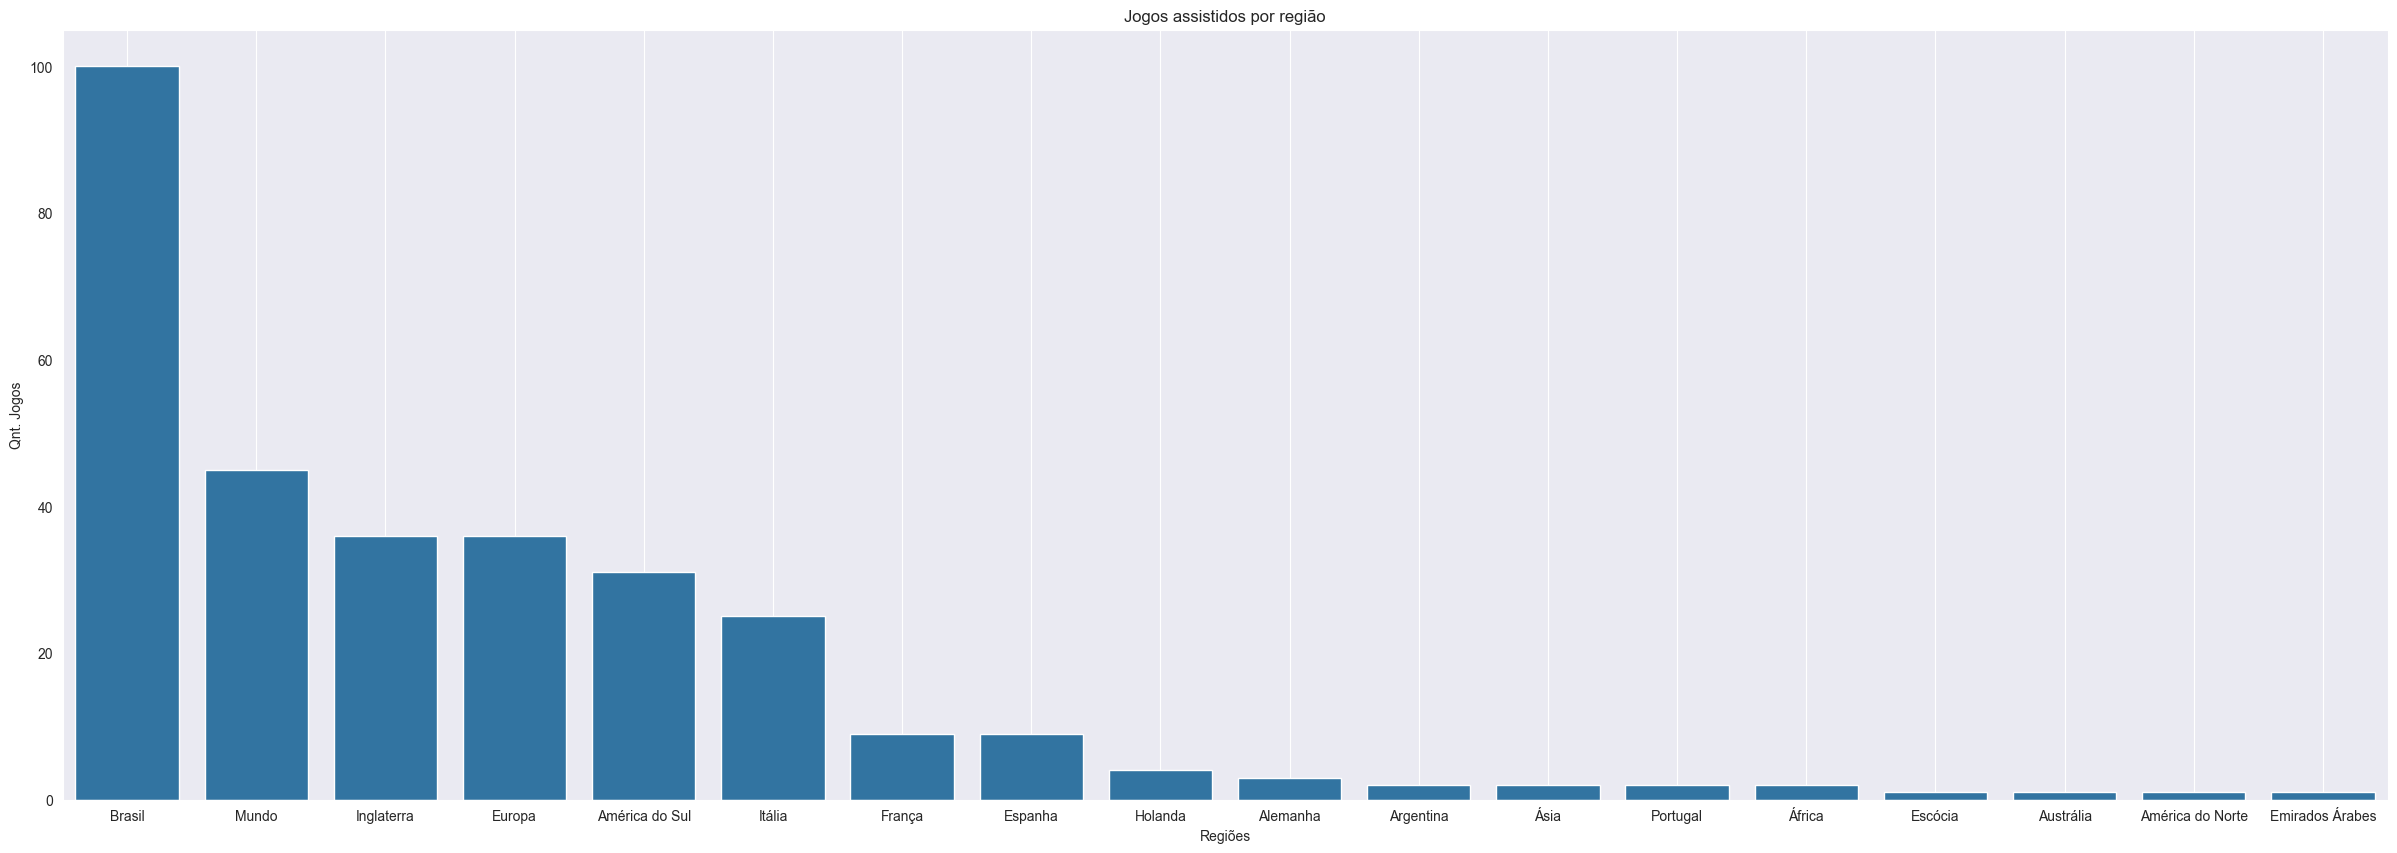

In [24]:
# Regiões assistidas:
df_reg = df['Região'].value_counts()
figure, ax = plt.subplots(figsize=(30,10))
sns.barplot(df_reg)
ax.set(xlabel='Regiões', ylabel='Qnt. Jogos', title='Jogos assistidos por região')
sns.set_style("darkgrid")
plt.grid()


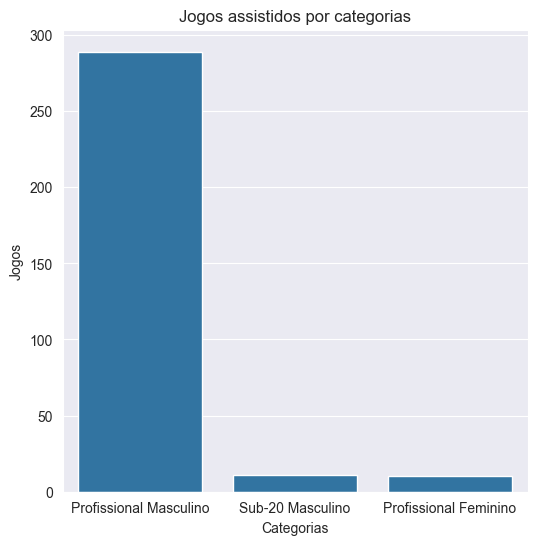

In [25]:
#Jogos por categoria
cat = df['Categoria'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(cat)
ax.set(xlabel='Categorias', ylabel='Jogos', title='Jogos assistidos por categorias')
sns.set_style("darkgrid")

In [28]:
# Vitória, Empate ou Derrota
# Se VED > 0: Vitória time da casa
# Se VED = 0: Empate
# Se VED < 0: Vitória do time visitante
df['VED'] = df['GC'] - df['GV']
vc = 0
vv = 0
em = 0
for res in df['VED']:
    if res > 0:
        vc += 1
    if res == 0:
        em += 1
    if res < 0:
        vv += 1
print(f'Vitórias dos times da casa: {vc}')
print(f'Vitórias dos visitantes: {vv}')
print(f'Empates: {em}')


Vitórias dos times da casa: 152
Vitórias dos visitantes: 79
Empates: 79
